In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [192]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv')
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        814 non-null    object 
 1   Type        814 non-null    object 
 2   Beds        814 non-null    int64  
 3   Baths       814 non-null    int64  
 4   SquareFeet  814 non-null    int64  
 5   Price       814 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 38.3+ KB


In [194]:
df.isnull().sum()

City          0
Type          0
Beds          0
Baths         0
SquareFeet    0
Price         0
dtype: int64

feature extraction for price prediction
- numerical columns => scatterplot, correlation(pearson coefficient)
- categorical columns => boxplot, ANOVA


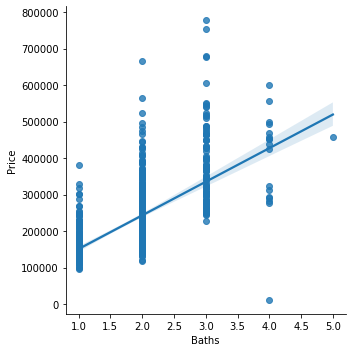

In [195]:
sns.lmplot(x='Baths', y='Price', data=df)

C:\Users\ZAID\AppData\Local\Temp\ipykernel_9656\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

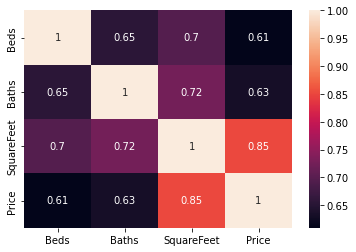

In [196]:
sns.heatmap(df.corr(), annot=True)

price is directly proportional to the squarefeet of the house, and bath and beds, in decresing order of importance

<AxesSubplot: xlabel='Baths', ylabel='Price'>

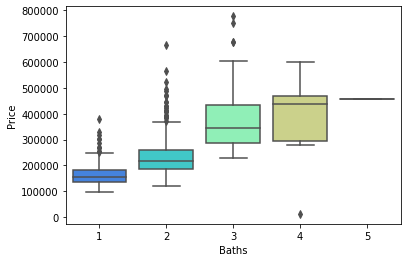

In [197]:
sns.boxplot(x='Baths', y='Price', data=df, palette='rainbow')

<AxesSubplot: xlabel='Beds', ylabel='Price'>

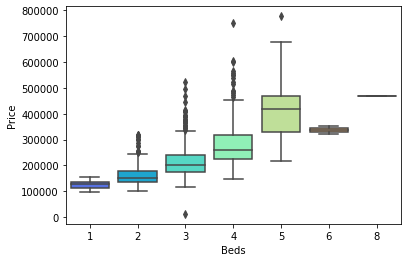

In [198]:
sns.boxplot(x='Beds', y='Price', data=df, palette='rainbow')

<AxesSubplot: xlabel='Type', ylabel='Price'>

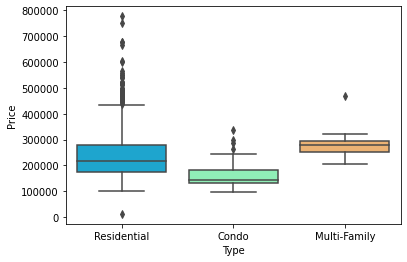

In [199]:
sns.boxplot(x='Type', y='Price', data=df, palette='rainbow')

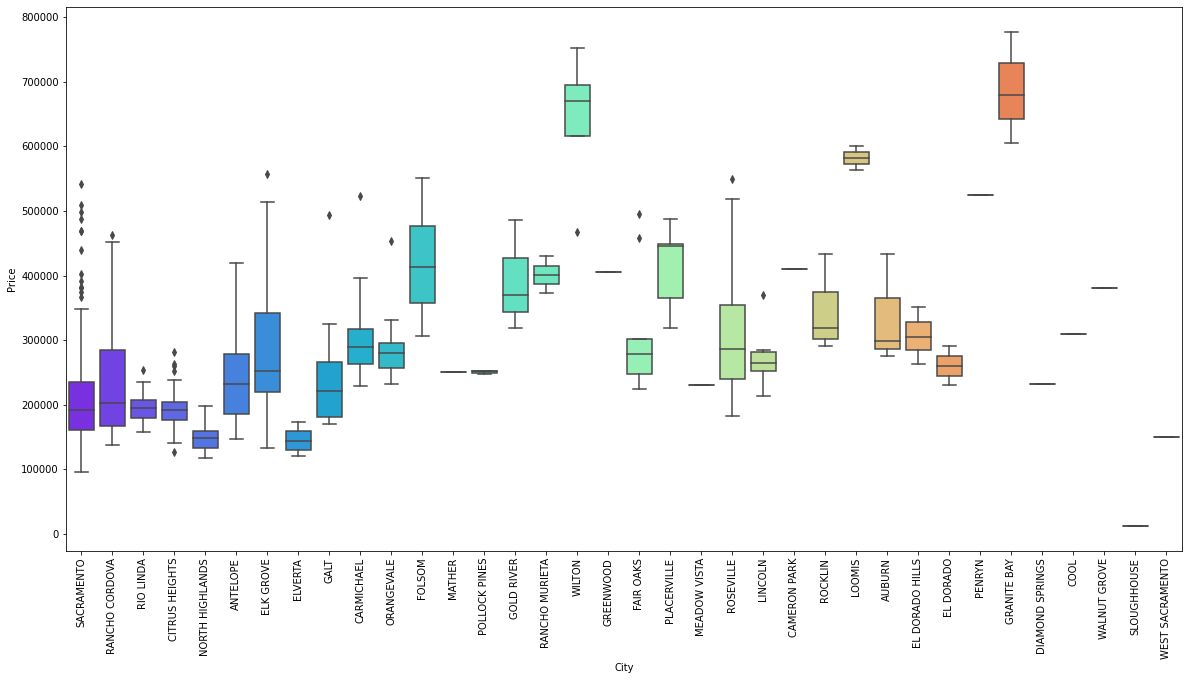

In [200]:
fig = plt.figure(figsize=(20, 10))
sns.boxplot(x='City', y='Price', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [201]:
X = df[['SquareFeet','Baths']] # vector
y = df['Price'] # scalar    

In [202]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [203]:
xtrain, xtest, ytrain, ytest = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((651, 2), (163, 2), (651,), (163,))

In [204]:
model.fit(xtrain, ytrain)
print('Training Score: ', model.score(xtrain, ytrain)*100)
print("Testing Score: ", model.score(xtest, ytest)*100)
ypred = model.predict(xtest)
print('MSE: ', mean_squared_error(ytest, ypred))
print("MAE", mean_absolute_error(ytest, ypred))

Training Score:  72.50081942537784
Testing Score:  72.9481129942022
MSE:  2266216688.1596794
MAE 24977.432761728956


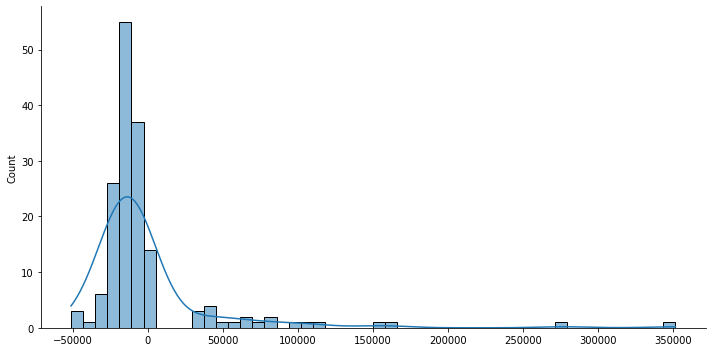

In [212]:
sns.displot((ytest-ypred), bins=50, kde=True, aspect=2)